## Saudi Arabia Used Cars Dataset
Used Cars Prices and Spec Scraped From Syarah Website

Content
The dataset contains 8248 records of used cars collected from syarah.com. Each row represents a used car with a link to its webpage. Other information regarding each car is the brand name, model, manufacturing year, origin, the color of the car, options, capacity of the engine, type of fuel, transmission type, the mileage that the car covered, region price, and negotiable.

## Library

In [445]:
# Pengolahan Data
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

# Preprocessing or Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Multiple Linear Regression
import statsmodels.api as sm

# pembagian data train test
from sklearn.model_selection import train_test_split

# evaluasi
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate

# ML Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

# perhitungan akurasi
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Dataset : Saudi Arabia Used Car

In [446]:
df = pd.read_csv('UsedCarsSA_Clean_EN (1).csv')

In [447]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,NaN,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000.0,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000.0,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,NaN,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000.0,False


In [448]:
age_car = []
for i in df['Year']:
    age = (2021 - i)
    age_car.append(age)
df['Age_car'] = age_car

In [449]:
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Age_car
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000.0,False,3
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,NaN,True,5
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500.0,False,2
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000.0,False,2
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500.0,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000.0,False,6
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000.0,False,11
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,NaN,True,8
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000.0,False,10


In [450]:
df = df[['Price','Make', 'Type', 'Age_car', 'Origin', 'Color', 'Options', 'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Negotiable',]]
df

,Price,Make,Type,Age_car,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Negotiable
0,114000.0,Chrysler,C300,3,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,False
1,NaN,Nissan,Patrol,5,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,True
2,27500.0,Nissan,Sunny,2,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,False
3,43000.0,Hyundai,Elantra,2,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,False
4,59500.0,Hyundai,Elantra,2,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,75000.0,Audi,A6,6,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,False
8031,53000.0,Chevrolet,Camaro,11,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,False
8032,NaN,Toyota,Land Cruiser,8,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,True
8033,22000.0,Nissan,Altima,10,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,False


In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        5509 non-null   float64
 1   Make         8035 non-null   object 
 2   Type         8035 non-null   object 
 3   Age_car      8035 non-null   int64  
 4   Origin       8035 non-null   object 
 5   Color        8035 non-null   object 
 6   Options      8035 non-null   object 
 7   Engine_Size  8035 non-null   float64
 8   Fuel_Type    8035 non-null   object 
 9   Gear_Type    8035 non-null   object 
 10  Mileage      8035 non-null   int64  
 11  Region       8035 non-null   object 
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 761.3+ KB


1. Make = Car manufacturing company (car brand)
1. Type = Car type 
1. Year = Year of car was made
1. Origin = Country of origin of the car manufacturer
1. Color = Car Color
1. Options = The condition of the car from the most full / complete to standard (Full, Semi Full, Standard)
1. Engine_Size = car engine capacity (Liters)
1. Fuel_Type = Type of Fuel (Gas, etc.)
1. Gear_Type = Car transition type (Manual and Automatic)
1. Mileage = Distance traveled by car (Miles)
1. Region = Origin / city of origin of used cars
1. Price = Price of a used car
1. Negotiable = Price of a used car that can be negotiable or not
1. age_car (new column) = age of the car (years)

Data Understanding
1. Data :
  1. Label : Price
  1. Features : Options, Engine_Size, Fuel_type, Gear_Type, Mileage, Negotiable, Age car 
1. ML Objective : Regression (numerical) -> KNN Regressor, Decision Tree regressor, Random Forest Regressor
1. Action : Read Dataset, EDA, Regression, Diagnostics and Collinearity, Assumption Summary, Conclusion
1. Value : Pembeli dan Penjual dapat membeli maupun menjual mobil bekas dengan harga yang sesuai (tidak overpricing maupun underpricing)


1. Define Problem:
1. Stakeholders that have problems from their Individual Insight: Used car sellers and used car buyers
1. Problems:
    1. Did the used car seller sell the car by underpricing or overpricing
    1. Did the used car buyer buy the car by underpricing or overpricing
2. Purpose:
    1. So the seller and the buyer are not harmed in terms of this case
    1. In addition, buyers can search for used cars that suit the needs and budget of the buyer
    1. Then, the seller can determine the selling price through the features of the used car such as the condition of the car, type of fuel, mileage (distance of the car), engine capacity of the car, and so on, so that the seller is not arbitrary in determining the selling price.



Data Understanding
1. Data :
  1. Label : Price
  1. Features : 'Make', 'Type', 'Age_car', 'Origin', 'Color', 'Options', 'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Negotiable'
df
1. ML Objective : Regression (numerical) -> Multiple Linear Regression, RandomForestRegression, XGBOOST
1. Action : Read Dataset, EDA and Data cleaning, Preprocessing and data analysis, and applying machine learning model
1. Value: Buyers and Sellers can buy or sell used cars at the right price (not overpricing or underpricing)

## Exploratory Data Analysis (EDA)

In [452]:
df.duplicated().any()

True

In [453]:
df.drop_duplicates(inplace = True)

## Preprocessing

>> ## Missing Value

In [454]:
df.isnull().sum()

Price          2525
Make              0
Type              0
Age_car           0
Origin            0
Color             0
Options           0
Engine_Size       0
Fuel_Type         0
Gear_Type         0
Mileage           0
Region            0
Negotiable        0
dtype: int64

In [455]:
df['Price'] = df.groupby('Options').transform(lambda x : x.fillna(x.median()))

In [456]:
df

,Price,Make,Type,Age_car,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Negotiable
0,114000.0,Chrysler,C300,3,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,False
1,81500.0,Nissan,Patrol,5,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,True
2,27500.0,Nissan,Sunny,2,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,False
3,43000.0,Hyundai,Elantra,2,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,False
4,59500.0,Hyundai,Elantra,2,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,75000.0,Audi,A6,6,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,False
8031,53000.0,Chevrolet,Camaro,11,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,False
8032,81500.0,Toyota,Land Cruiser,8,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,True
8033,22000.0,Nissan,Altima,10,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,False


In [457]:
df.nunique()

Price           541
Make             59
Type            381
Age_car          52
Origin            4
Color            15
Options           3
Engine_Size      75
Fuel_Type         3
Gear_Type         2
Mileage        2175
Region           27
Negotiable        2
dtype: int64

In [458]:
df['Fuel_Type'].unique()

array(['Gas', 'Diesel', 'Hybrid'], dtype=object)

In [459]:
df['Options'].unique()

array(['Full', 'Standard', 'Semi Full'], dtype=object)

In [460]:
df['Origin'].unique()

array(['Saudi', 'Gulf Arabic', 'Other', 'Unknown'], dtype=object)

Text(0.5, 0, 'Price ($)')

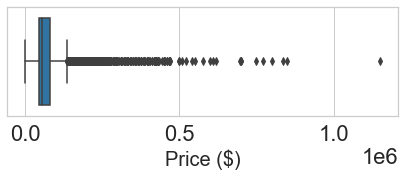

In [461]:
plt.figure(figsize = (7,2))
sns.boxplot(x = df['Price'])
plt.xlabel('Price ($)', fontsize =20)

Text(0.5, 0, 'Mileage (miles)')

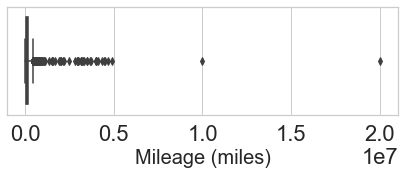

In [462]:
plt.figure(figsize = (7,2))
sns.boxplot(x = df['Mileage'])
plt.xlabel('Mileage (miles)', fontsize =20)

In [463]:
df['Mileage'].max()

20000000

In [464]:
df.loc[df['Mileage'] == 20000000]

,Price,Make,Type,Age_car,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Negotiable
7391,9000.0,Chevrolet,Optra,12,Other,Another Color,Semi Full,1.6,Gas,Manual,20000000,Riyadh,False


In [465]:
df.drop([7391], axis = 0, inplace = True)

In [466]:
df['Mileage'].max()

9999999

In [467]:
df.loc[df['Mileage'] == 9999999]

,Price,Make,Type,Age_car,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Negotiable
4475,81500.0,Mercedes,POS24,38,Other,Another Color,Full,8.0,Diesel,Manual,9999999,Aseer,True


In [468]:
df.drop([4475], axis=0, inplace = True)

Text(0.5, 0, 'Mileage (Miles)')

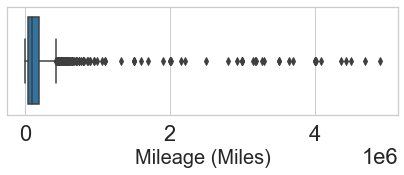

In [469]:
plt.figure(figsize = (7,2))
sns.boxplot(x =df['Mileage'])
plt.xlabel('Mileage (Miles)', fontsize = 20)

In [470]:
df

,Price,Make,Type,Age_car,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Negotiable
0,114000.0,Chrysler,C300,3,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,False
1,81500.0,Nissan,Patrol,5,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,True
2,27500.0,Nissan,Sunny,2,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,False
3,43000.0,Hyundai,Elantra,2,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,False
4,59500.0,Hyundai,Elantra,2,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,75000.0,Audi,A6,6,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,False
8031,53000.0,Chevrolet,Camaro,11,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,False
8032,81500.0,Toyota,Land Cruiser,8,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,True
8033,22000.0,Nissan,Altima,10,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,False


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8030 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        8030 non-null   object 
 1   Make         8030 non-null   object 
 2   Type         8030 non-null   object 
 3   Age_car      8030 non-null   int64  
 4   Origin       8030 non-null   object 
 5   Color        8030 non-null   object 
 6   Options      8030 non-null   object 
 7   Engine_Size  8030 non-null   float64
 8   Fuel_Type    8030 non-null   object 
 9   Gear_Type    8030 non-null   object 
 10  Mileage      8030 non-null   int64  
 11  Region       8030 non-null   object 
 12  Negotiable   8030 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 823.4+ KB


In [472]:
df['Price'] = df['Price'].astype('int64')

> ## Correlation between features

<AxesSubplot:>

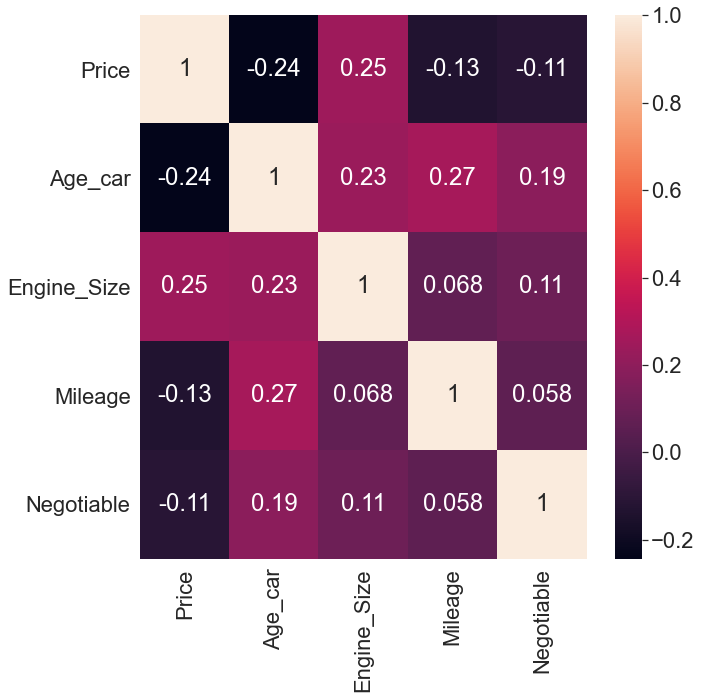

In [473]:
plt.figure(figsize =(10,10))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

In [474]:
df_corr['Price'].sort_values(ascending = False)

Price          1.000000
Engine_Size    0.245735
Negotiable    -0.107688
Mileage       -0.133264
Age_car       -0.243224
Name: Price, dtype: float64

1. positive sign means positive correlation. example: the higher the engine_size, the higher the price of the used car 
1. negative sign means negative correlation. For example: the older the car, the lower the price of the car

> # Encoding

In [475]:
df_dummy = pd.get_dummies(df, drop_first = True, columns = ['Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type', 'Gear_Type', 'Region', 'Negotiable'])
df_dummy

,Price,Age_car,Engine_Size,Mileage,Make_Audi,Make_BMW,Make_BYD,Make_Bentley,Make_Cadillac,Make_Changan,...,Region_Qassim,Region_Qurayyat,Region_Riyadh,Region_Sabya,Region_Sakaka,Region_Tabouk,Region_Taef,Region_Wadi Dawasir,Region_Yanbu,Negotiable_True
0,114000,3,5.7,103000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,81500,5,4.8,5448,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,27500,2,1.5,72418,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,43000,2,1.6,114154,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,59500,2,2.0,41912,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,75000,6,3.0,77000,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8031,53000,11,3.6,150000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8032,81500,8,4.6,260,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8033,22000,10,2.5,18500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [476]:
column_sets = ['Engine_Size', 'Mileage', 'Age_car']
X = df_dummy.drop(columns = ['Price'])
y = df_dummy['Price']

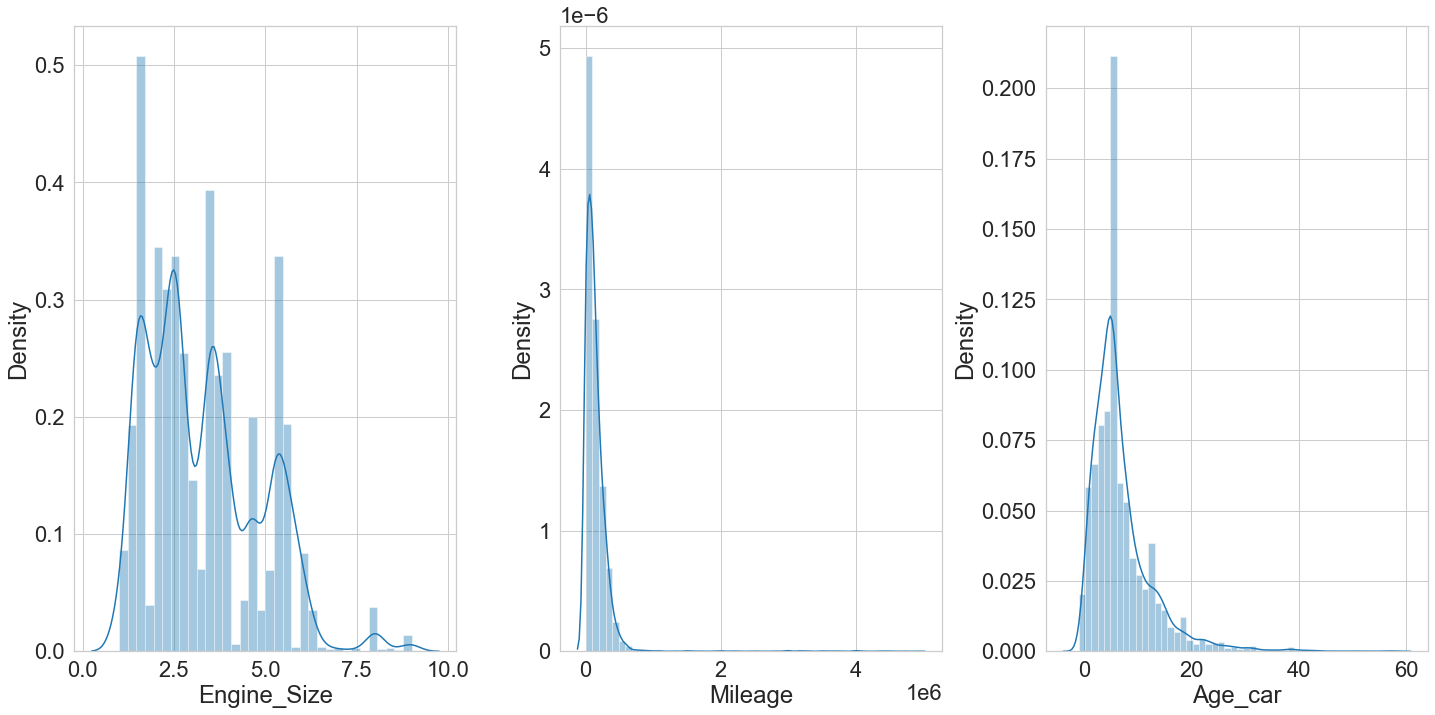

In [477]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k in column_sets:
        sns.distplot(X[k], ax = axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad = 0.5, h_pad =5.0)


In [478]:
for k in column_sets:
    if (X[k].skew()) > 0.5 or (X[k].skew()) < -0.5:
        print(k, X[k].skew(), '----------------> highly skewed')
    else:
        print(k, X[k].skew())

Engine_Size 0.7406829123159299 ----------------> highly skewed
Mileage 10.784664369154324 ----------------> highly skewed
Age_car 2.345085901082571 ----------------> highly skewed


> # Data Spliting

In [479]:
X = df_dummy.drop(columns = ['Price'])
y = df_dummy['Price']

In [480]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 2020
)

## Select Model Benchmark

1. Multiple Linear Regression
1. Random Forest Regression
1. XGBOOST

> # Multiple Linear Regression

In [481]:
sm_lm = sm.OLS(y, sm.add_constant(X))
result = sm_lm.fit()

In [482]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     23.15
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:17:52   Log-Likelihood:                -96673.
No. Observations:                8030   AIC:                         1.942e+05
Df Residuals:                    7578   BIC:                         1.974e+05
Df Model:                         451                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

> ## Assumption

Cek beberapa asumsi dan Multikol dari data

> #Normality

Text(0.5, 0, 'Residuals')

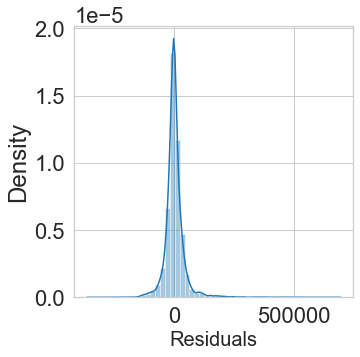

In [483]:
plt.figure(figsize = (5,5))
sns.set_context('notebook', font_scale = 2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

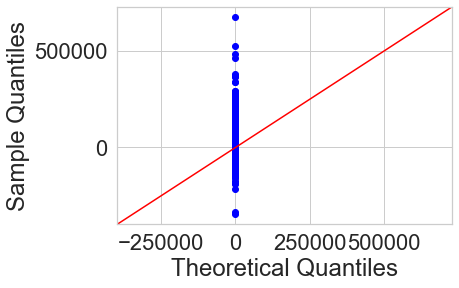

In [484]:
sm.qqplot(result.resid, line = '45')
plt.show()

> #Gauss Markov

Text(0, 0.5, 'Residuals')

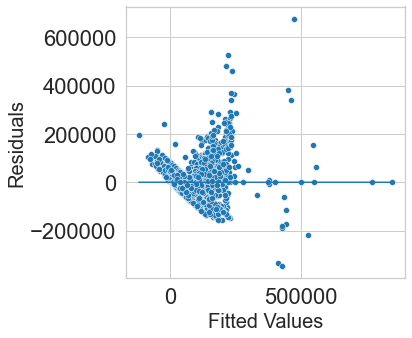

In [485]:
plt.figure(figsize = (5,5))
sns.set_context('notebook', font_scale = 2)
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

> Multicollinearity

In [486]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [487]:
def calc_vif(X):
    
    #Calculating VIF:
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [488]:
calc_vif(X)

,Variables,VIF
0,Age_car,2.046922
1,Engine_Size,3.474642
2,Mileage,1.221149
3,Make_Audi,inf
4,Make_BMW,inf
...,...,...
485,Region_Tabouk,2.574625
486,Region_Taef,2.660315
487,Region_Wadi Dawasir,1.246586
488,Region_Yanbu,1.497374


> Assumption Conclusion 1 

1. If we look at the histogram, the residuals are normally distributed
1. Residual model does not converge at zero
1. There is no clear pattern in the residual plot so it doesn't match Linear Regression
1. Heteroscedasticity occurs
1. A little vif is not acceptable, because the value of many vif is very large

In [491]:
model_lr = LinearRegression()
model_lr.fit(X_trainval, y_trainval)

LinearRegression()

In [492]:
y_pred_lr = model_lr.predict(X_test)

In [493]:
#Metrics Evaluation
acc_lr = r2_score(y_test, y_pred_lr)
print('r_squared score is', acc_lr)
print('mse', mean_squared_error(y_test, y_pred_lr))
print('mae', mean_absolute_error(y_test, y_pred_lr))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('mape', mean_absolute_percentage_error(y_test, y_pred_lr))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

r_squared score is 0.4621399515016663
mse 2233529552.4216876
mae 27444.631588744825
rmse 47260.23225103414
mape 50.776284930991835


In [494]:
def compare_lr():
    
    #Calculating compare_mlr:
    compare_lr = pd.DataFrame()
    compare_lr['Original'] = y_test.reset_index(drop = True)
    compare_lr['Prediction'] = pd.DataFrame(y_pred_lr)
    
    return(compare_lr)

In [495]:
compare_lr()

,Original,Prediction
0,81500,79960.780012
1,73000,61295.465658
2,459000,226763.157948
3,55000,91299.160289
4,126500,138313.846092
...,...,...
2404,45000,55718.784814
2405,89500,96555.236697
2406,19000,29078.877288
2407,60000,65908.303892


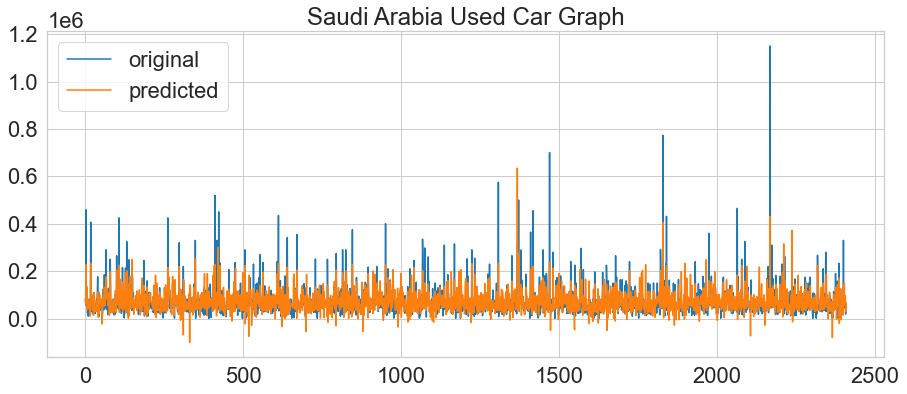

In [496]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_lr, label="predicted")
plt.title("Saudi Arabia Used Car Graph")
plt.legend()
plt.show()

## Random Forest Regressor

In [497]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_trainval, y_trainval)

RandomForestRegressor()

In [498]:
# Model Prediction

y_pred_freg = model.predict(X_test)

In [499]:
#Metrics Evaluation
acc_freg = r2_score(y_test, y_pred_freg)
print('r_squared score is', acc_freg)
print('mse', mean_squared_error(y_test, y_pred_freg))
print('mae', mean_absolute_error(y_test, y_pred_freg))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_freg)))
print('mape', mean_absolute_percentage_error(y_test, y_pred_freg))
rmse_freg = mean_absolute_error(y_test, y_pred_freg)
mape_freg = mean_absolute_percentage_error(y_test, y_pred_freg)

r_squared score is 0.8053386296805598
mse 808355118.6544738
mae 10359.701910099035
rmse 28431.586636247965
mape 61.519452542154745


In [500]:
def compare_fr():
    
    #Calculating compare_fr:
    compare_fr = pd.DataFrame()
    compare_fr['Original'] = y_test.reset_index(drop = True)
    compare_fr['Prediction'] = pd.DataFrame(y_pred_freg)
    
    return(compare_fr)

In [501]:
compare_fr()

,Original,Prediction
0,81500,81880.00
1,73000,49878.97
2,459000,441425.00
3,55000,69556.74
4,126500,115415.00
...,...,...
2404,45000,45000.00
2405,89500,80753.25
2406,19000,30545.00
2407,60000,52160.00


<AxesSubplot:>

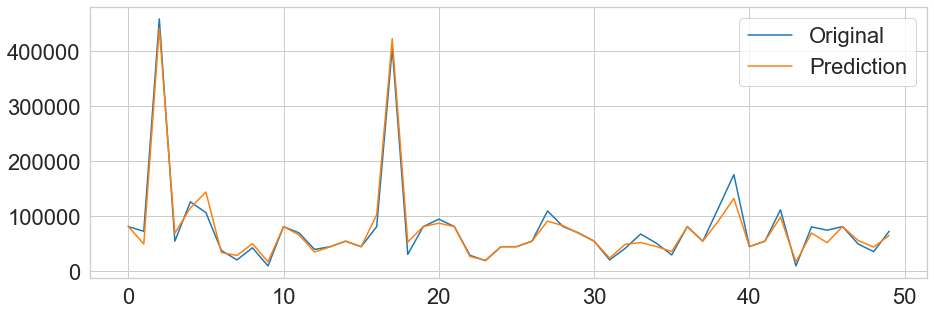

In [502]:
sns.set_style('whitegrid')
compare_fr().head(50).plot(kind = 'line', figsize = (15,5))

> Model Properties

feature importance and decision tree

In [503]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = [df_dummy.drop(columns = ['Price'])])

In [519]:
imp_table_fr = importance_table.sort_values(by = 'imp',ascending = False)

In [520]:
imp_table_fr

,imp
Age_car,0.225984
Engine_Size,0.104939
Negotiable_True,0.092163
Make_Mercedes,0.082214
Mileage,0.048900
...,...
Type_Montero,0.000000
Type_Freestar,0.000000
Type_Murano,0.000000
Type_New Yorker,0.000000


<AxesSubplot:>

<Figure size 216x216 with 0 Axes>

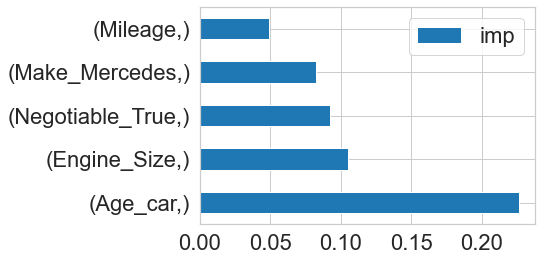

In [521]:
plt.figure(figsize = (3,3))
imp_table_fr.head(5).plot(kind = 'barh')

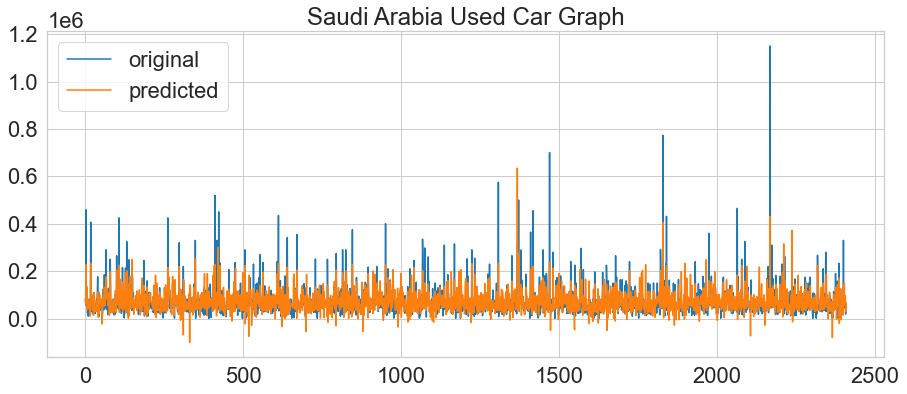

In [507]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_lr, label="predicted")
plt.title("Saudi Arabia Used Car Graph")
plt.legend()
plt.show()

## XGBOOST

In [508]:
from xgboost import XGBRegressor

In [509]:
xgbreg = XGBRegressor()
xgbreg.fit(X_trainval, y_trainval)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [510]:
y_pred_xgbreg = xgbreg.predict(X_test)

In [511]:
#Metrics Evaluation
acc_xgb = r2_score(y_test, y_pred_xgbreg)
print('r_squared score is', acc_xgb)
print('mse', mean_squared_error(y_test, y_pred_xgbreg))
print('mae', mean_absolute_error(y_test, y_pred_xgbreg))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_xgbreg)))
print('mape', mean_absolute_percentage_error(y_test, y_pred_xgbreg))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgbreg))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgbreg)

r_squared score is 0.835812302350621
mse 681809470.4520541
mae 12150.448457242048
rmse 26111.481582860328
mape 83.79175289525466


> ## Comparing the results of the modeling that has been done from R^2

In [512]:
models = pd.DataFrame({
    'Model' : ['Multi Linear Regression', 'Random Forest', 'XGBoost'],
    'R-Squared Score' : [acc_lr, acc_freg, acc_xgb]})

models.sort_values(by = 'R-Squared Score', ascending = False)

,Model,R-Squared Score
2,XGBoost,0.835812
1,Random Forest,0.805339
0,Multi Linear Regression,0.462140


In [513]:
models = pd.DataFrame({
    'Model' : ['Multi Linear Regression', 'Random Forest', 'XGBoost'],
    'mape' : [mape_lr, mape_freg, mape_xgb]})

models.sort_values(by = 'mape', ascending = True)

,Model,mape
0,Multi Linear Regression,50.776285
1,Random Forest,61.519453
2,XGBoost,83.791753


In [514]:
models = pd.DataFrame({
    'Model' : ['Multi Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE' : [rmse_lr, rmse_freg, rmse_xgb]})

models.sort_values(by = 'RMSE', ascending = True)

,Model,RMSE
1,Random Forest,10359.701910
2,XGBoost,26111.481583
0,Multi Linear Regression,47260.232251


## Conclusion

1. Using the Random Forest Model one, because it has the highest R-Squared accuracy value compared to XGBoost.
1. Prefer using the Random Forest Model one, besides XGBOOST because Random Forest has smaller residual value (Mape and RMSE) than XGBOOST
1. Prediction price compared to the actual price have the differences. Some should be cheaper and some should be more expensive. So that car sellers and buyers are expected to make predictions with the machine learning random forest method so those sellers do not sell used cars too expensive or too cheap. And buyers can buy cars as needed, not too expensive or too cheap
1. The most importance features are listed ascending:
      Age_car (1)
      Machine size (2)
      negotiable_true (3)
      Make_Mercedes (4)
      Mileage (5)
      So if it is recommended to create a more accurate machine learning model, only the 5 features above are recommended

In [518]:
compare_fr().head(25)

,Original,Prediction
0,81500,81880.00
1,73000,49878.97
2,459000,441425.00
3,55000,69556.74
4,126500,115415.00
5,107000,144284.87
6,38000,34370.00
7,21000,29100.00
8,43000,50544.00
9,10000,17385.00


<AxesSubplot:>

<Figure size 216x216 with 0 Axes>

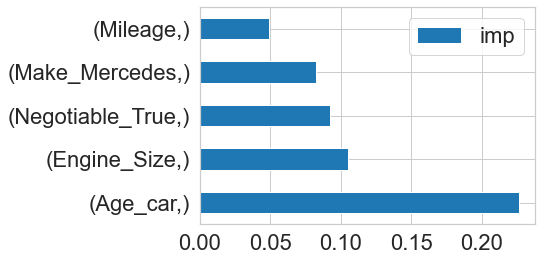

In [522]:
plt.figure(figsize = (3,3))
imp_table_fr.head(5).plot(kind = 'barh')